# Importing Libraries

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [200]:
df = pd.read_excel("D:\\Users\\Raju A S\\hotel_reviews.xlsx")

In [201]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [202]:
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


# Exploratory Data Analysis

In [203]:
df.shape

(20491, 2)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [205]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Value count

In [206]:
df.nunique()

Review    20491
Rating        5
dtype: int64

In [207]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [208]:
(df['Rating'].value_counts()/df.shape[0]*100)

Rating
5    44.185252
4    29.471475
3    10.658338
2     8.750183
1     6.934752
Name: count, dtype: float64

# Missing Values

# Correlation

In [209]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')


In [210]:
non_numeric_values = df_numeric[df_numeric.isna().any(axis=1)]
print("Rows with non-numeric values:")
print(non_numeric_values)

Rows with non-numeric values:
       Review  Rating
0         NaN       4
1         NaN       2
2         NaN       3
3         NaN       5
4         NaN       5
...       ...     ...
20486     NaN       5
20487     NaN       4
20488     NaN       2
20489     NaN       1
20490     NaN       2

[20491 rows x 2 columns]


In [211]:
df_numeric.dropna(inplace=True)

In [212]:
correlations = df_numeric.corr()
print(correlations)

        Review  Rating
Review     NaN     NaN
Rating     NaN     NaN


In [213]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

# Heatmap

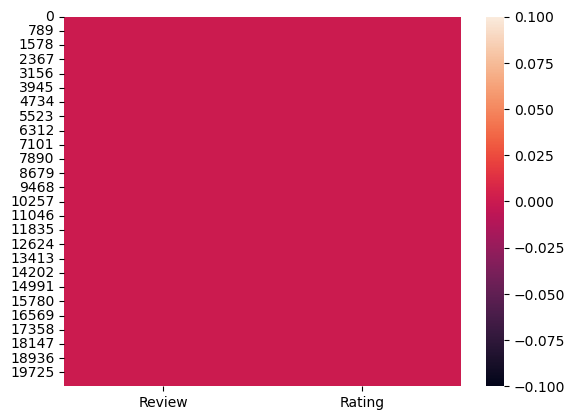

In [214]:
sns.heatmap(df.isnull());

In [215]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Visualization

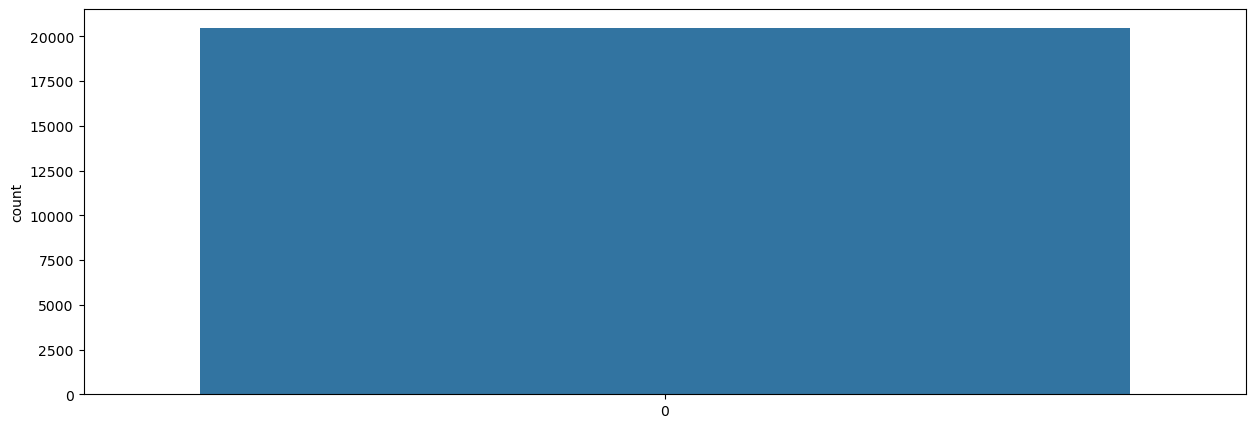

In [216]:
plt.figure(figsize=(15,5))
sns.countplot(df['Rating'])
plt.show()

(0.0, 9959.400000000001)

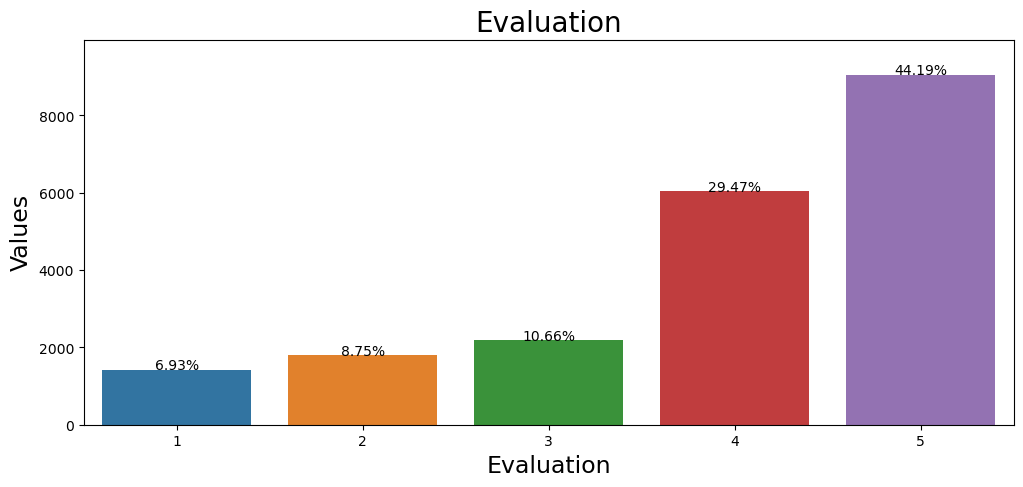

In [217]:
total = len(df)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Rating', data=df)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

We can See that the highest rating is on 4 and 5 

<Axes: xlabel='Rating', ylabel='Density'>

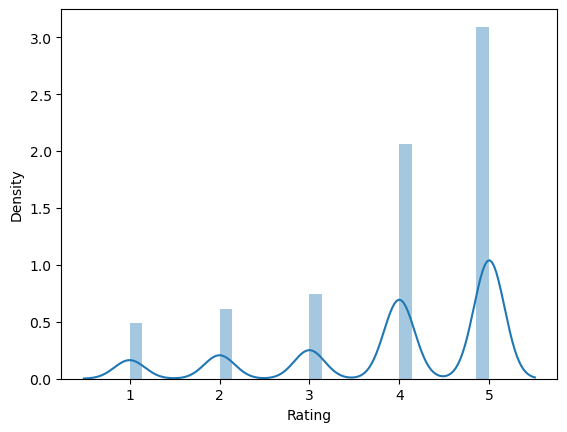

In [218]:
sns.distplot(df['Rating'])

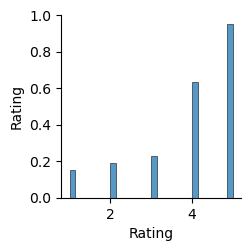

In [219]:
sns.pairplot(df)

Inferences :Observations from text:

Most of the reviews are long and contain more that 5 sentences. 
The reviews seems of the Trip Advisor Hotel about the amenties and experinces
reviews are in English (from preliminary analysis)
There is emphasis placed on certain words by capitalizing them. So, LOWERCASE CONVERSION will not be done FOR VADER MODEL. 
There are certain emojis and characters which have to be removed. 
There are also some reviews with major spelling errors. 
spelling errors will not be handled now, but in the future, spelling correction will greatly help in reducing size of and making the vocabulary more effective and expressive.


## Outliers 

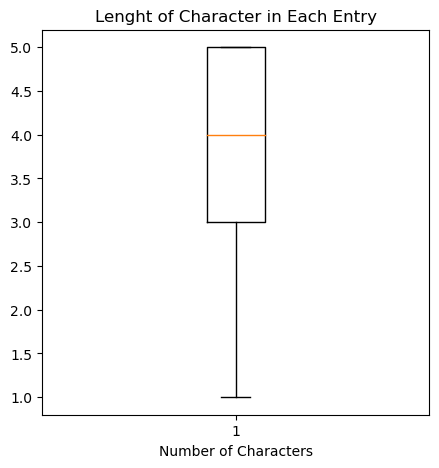

In [220]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df['Rating'])
plt.title("Lenght of Character in Each Entry")
plt.xlabel('Number of Characters')
plt.show()

There is no outerlier detected because we don't have categorical data.

## printing some reviews

In [221]:
df['Review'][:5].values

array(['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
       'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroo

# checking for null values

In [222]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

# Converting To Lowercase and Replace

In [223]:
df['Review_clean']=df['Review'].str.replace('[^a-zA-Z\s]','')
df['Review_clean'][:2].values

array(['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
       'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroo

# Tokenization 

In [224]:
import re
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer= WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)


# Remove Stopwords

In [225]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwrds=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
from sklearn.feature_extraction.text import CountVectorizer
def get_bigram(df,n):
   
    vec=CountVectorizer(ngram_range=(2,2),stop_words=stopwrds).fit(df)
    bag_of_words=vec.transform(df)
    sum_words=bag_of_words.sum(0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]

In [227]:
from sklearn.feature_extraction.text import CountVectorizer

def get_bigram(df, n):
    stop_words = ['if', 'up', 'we', "haven't", 'at', 'such', 'with', 'themselves', 'haven', "didn't", 'hadn', 'himself', 'having', 'ours', "don't", 'where', 'isn', 'mustn', 'i', 'are', 'll', 'him', 'when', 'so', 'by', 'all', "wasn't", 'during', 'am', 'she', 'because', 'once', 'is', "isn't", 'whom', 'wasn', 'couldn', 'herself', 'same', 'any', 'on', 'after', 'before', 'here', 'her', "aren't", 'does', 'through', 'you', 'won', 'his', 'can', "you've", 'didn', 'ma', 'who', 'now', 'yourself', 'each', 'o', 'needn', 'of', 'was', 'were', 'about', 'this', 'an', "doesn't", 'above', 'a', 'weren', 'yourselves', 'just', 'aren', 'not', 'being', 'few', 'as', 'shan', "you'd", 'nor', 'y', "hasn't", "you'll", 'while', 'too', "hadn't", "should've", 'how', 're', 'should', 'its', 'or', 'against', 'what', 'itself', 'been', "shouldn't", 'some', 'has', "shan't", 'from', 'in', 'their', 'doing', 'do', 've', 'to', "it's", 'ain', 'under', 'below', "mustn't", 'doesn', 't', 'ourselves', 'your', 'he', 'own', 'and', 'most', 'did', "wouldn't", 'these', 'myself', 'shouldn', 'will', 'other', "weren't", 'very', 's', "mightn't", 'have', 'out', 'the', 'hasn', 'm', 'only', 'it', 'them', 'my', 'then', "you're", 'between', 'more', 'had', "needn't", 'don', 'd', "that'll", 'but', "she's", 'wouldn', 'down', 'theirs', 'again', "couldn't", 'into', 'than', 'yours', 'me', 'they', 'those', 'for', "won't", 'be', 'until', 'there', 'off', 'mightn', 'both', 'which', 'over', 'no', 'our', 'hers', 'why', 'that', 'further']
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(df)
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

bigram_rat1 = get_bigram(df.loc[df['Rating']==1, 'Review'].apply(lambda x: " ".join(sent for sent in x.split() if sent not in ['did', 'not', 'hotel', 'room', 'does'])), 10)
bigram_rat1

[('punta cana', 151),
 ('credit card', 114),
 ('customer service', 108),
 ('stay away', 80),
 ('air conditioning', 78),
 ('travel agent', 66),
 ('san juan', 62),
 ('hot water', 61),
 ('desk staff', 57),
 ('new orleans', 54)]

In [228]:
bigram_rat1=get_bigram(df.loc[df['Rating']==1,'Review'].apply(lambda x:" ".join(sent for sent in x.split() 
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat1

[('punta cana', 151),
 ('credit card', 114),
 ('customer service', 108),
 ('stay away', 80),
 ('air conditioning', 78),
 ('travel agent', 66),
 ('san juan', 62),
 ('hot water', 61),
 ('desk staff', 57),
 ('new orleans', 54)]

In [229]:
bigram_rat2=get_bigram(df.loc[df['Rating']==2,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat2

[('punta cana', 201),
 ('air conditioning', 142),
 ('staff friendly', 128),
 ('san juan', 100),
 ('great location', 97),
 ('make sure', 89),
 ('stayed nights', 88),
 ('good location', 78),
 ('customer service', 75),
 ('non smoking', 73)]

In [230]:
bigram_rat3=get_bigram(df.loc[df['Rating']==3,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                    if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat3

[('great location', 251),
 ('staff friendly', 242),
 ('punta cana', 207),
 ('good location', 176),
 ('stayed nights', 146),
 ('walking distance', 135),
 ('san juan', 130),
 ('good value', 122),
 ('location great', 114),
 ('make sure', 114)]

In [231]:
bigram_rat4=get_bigram(df.loc[df['Rating']==4,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                        if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat4

[('great location', 845),
 ('staff friendly', 763),
 ('punta cana', 565),
 ('walking distance', 528),
 ('friendly helpful', 503),
 ('staff helpful', 416),
 ('good value', 414),
 ('stayed nights', 409),
 ('minute walk', 402),
 ('great time', 401)]

In [232]:
bigram_rat5=get_bigram(df.loc[df['Rating']==5,'Review'].apply(lambda x:" ".join(sent for sent in x.split()
                                                    if sent not in ['did','not','hotel','room','does'])),10)
bigram_rat5

[('great location', 1014),
 ('staff friendly', 1013),
 ('friendly helpful', 777),
 ('highly recommend', 736),
 ('walking distance', 735),
 ('punta cana', 603),
 ('staff helpful', 540),
 ('place stay', 540),
 ('stayed nights', 511),
 ('minute walk', 511)]

## Check for common words in highest rated reviews

In [233]:
set([x[0] for x in bigram_rat3])\
&set([x[0] for x in bigram_rat4])\
&set([x[0] for x in bigram_rat5])

{'great location',
 'punta cana',
 'staff friendly',
 'stayed nights',
 'walking distance'}

## Check for common words in least rated reviews 

In [234]:
set([x[0] for x in bigram_rat1])&set([x[0] for x in bigram_rat2])&set([x[0] for x in bigram_rat3])

{'punta cana', 'san juan'}

In [235]:
import re
import string
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmetization

In [236]:
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)

In [237]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['cleaned_review']=df['Review'].apply(lambda x :preprocess(x))
df['cleaned_review']

0        nice hotel expensive parking got good deal sta...
1        nothing special charge diamond member hilton d...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm star beat ...
20487    great location price view hotel great quick pl...
20488    look nice modern outside desk staff particular...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking believe excellent rating hotel ...
Name: cleaned_review, Length: 20491, dtype: object

In [238]:
from textblob import TextBlob
import matplotlib.pyplot  as plt
import seaborn as sns

In [239]:
df['sentiment']=df['cleaned_review'].apply(lambda x : TextBlob(x).sentiment.polarity)
df.head()

,Review,Rating,Review_clean,cleaned_review,sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.208744
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,nothing special charge diamond member hilton d...,0.238948
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice room experience hotel monaco seattle good...,0.266138
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,0.504825
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,0.469643


In [240]:
def assign_Result(marks):
    if marks < 0:
        result = 'negative'
    elif marks >= 0:
        result = 'positive'

    return result

In [241]:
df['review_segment']=df['sentiment'].apply(assign_Result)
df.head()


,Review,Rating,Review_clean,cleaned_review,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.208744,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,nothing special charge diamond member hilton d...,0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice room experience hotel monaco seattle good...,0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,0.469643,positive


# Word Cloud For Review_clean column

In [242]:
from wordcloud import WordCloud 

# Sentimental Analysis

In [243]:
def get_sentiment(data): 

    analysis = TextBlob(data)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [244]:
a='nice hotel not nice staff hotel lovely staff quite rude, bellhop desk clerk going way make things difficult, waited forever check heavy bags no help getting throught double doors room, worst desk clerk checking tap tap tap car waited pick 20 minutes, got home noticed 1,000 dollar hold credit card took 5 phonecalls 2 faxes 1 week resolved, stay warwck 4th lenora rooms ok..but al friendly faces tiring day airport'

get_sentiment(a)

'negative'

## Vader lexicon

In [245]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [246]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
b='nice hotel not nice staff hotel lovely staff quite rude, bellhop desk clerk going way make things difficult, waited forever check heavy bags no help getting throught double doors room, worst desk clerk checking tap tap tap car waited pick 20 minutes, got home noticed 1,000 dollar hold credit card took 5 phonecalls 2 faxes 1 week resolved, stay warwck 4th lenora rooms ok..but al friendly faces tiring day airport'
sia.polarity_scores(b)

{'neg': 0.138, 'neu': 0.639, 'pos': 0.224, 'compound': 0.7584}

In [247]:
def get_vader_sentiment(data): 

    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(data)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [248]:
get_vader_sentiment(b)

'positive'

In [249]:
df['review_segment']=df['sentiment'].apply(assign_Result)
df.head()


,Review,Rating,Review_clean,cleaned_review,sentiment,review_segment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.208744,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,nothing special charge diamond member hilton d...,0.238948,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice room experience hotel monaco seattle good...,0.266138,positive
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,0.469643,positive


In [250]:
df.tail()

,Review,Rating,Review_clean,cleaned_review,sentiment,review_segment
20486,"best kept secret 3rd time staying charm, not 5...",5,"best kept secret 3rd time staying charm, not 5...",best kept secret time staying charm star beat ...,0.209229,positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,great location price view hotel great quick pl...,0.463333,positive
20488,"ok just looks nice modern outside, desk staff ...",2,"ok just looks nice modern outside, desk staff ...",look nice modern outside desk staff particular...,0.145929,positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...,0.145881,positive
20490,"people talking, ca n't believe excellent ratin...",2,"people talking, ca n't believe excellent ratin...",people talking believe excellent rating hotel ...,0.110615,positive


In [251]:
sia.polarity_scores(df.loc[0]['Review'])

{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}

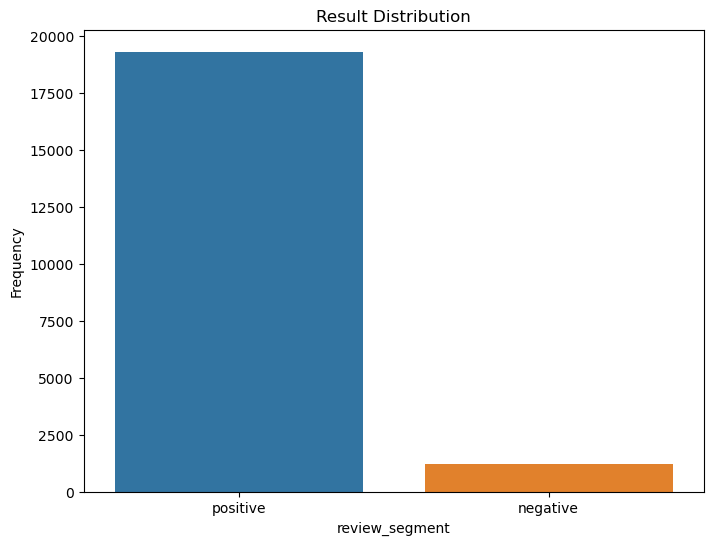

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

x = df['review_segment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=x.index, y=x.values)
plt.title('Result Distribution')
plt.ylabel('Frequency', fontsize=10)
plt.show()

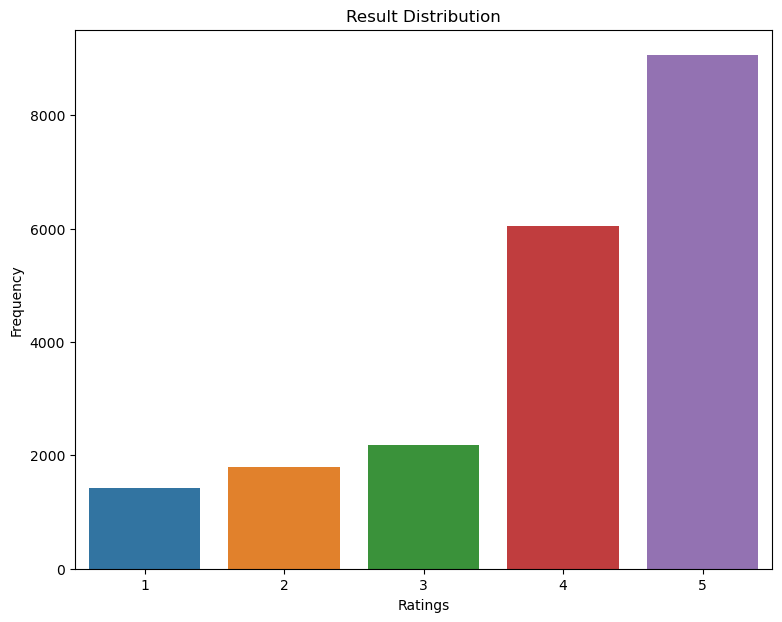

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df['Rating'].value_counts()
plt.figure(figsize=(9, 7))
sns.barplot(x=x.index, y=x.values)
plt.title('Result Distribution')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Ratings', fontsize=10)
plt.xticks(fontsize=10)
plt.show()


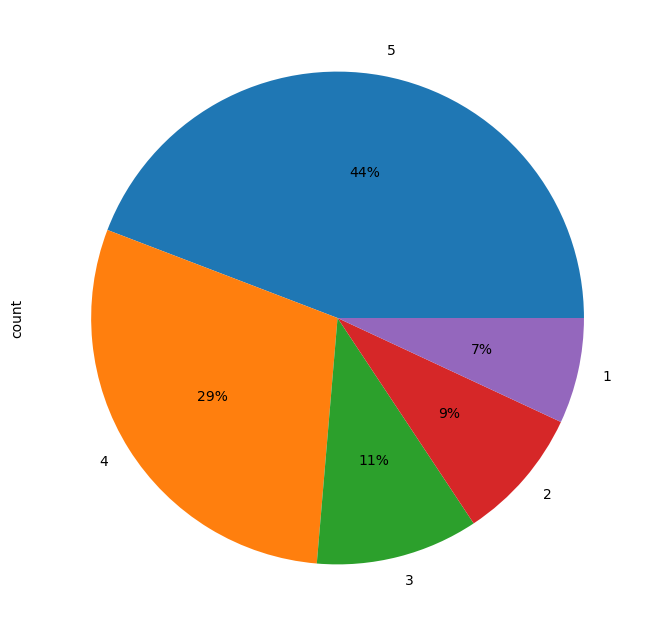

In [254]:
plt.figure(figsize=(10,8))
df['Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

# Lemmatization

In [255]:
def lemmatise(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)
tokenizer = RegexpTokenizer(r'\w+')
df['lemmatized_content']=df['cleaned_review'].map(lambda x : tokenizer.tokenize(lemmatise(x)))
df['lemmatized_content']

0        [nice, hotel, expensive, parking, got, good, d...
1        [nothing, special, charge, diamond, member, hi...
2        [nice, room, experience, hotel, monaco, seattl...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, sta...
20487    [great, location, price, view, hotel, great, q...
20488    [look, nice, modern, outside, desk, staff, par...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, believe, excellent, rating, ...
Name: lemmatized_content, Length: 20491, dtype: object

In [256]:
words=df['lemmatized_content']
allwords=[]
for wordlist in words:
    allwords+=wordlist
print(allwords)
print('length of all words : ',len(allwords))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Most Common Words

In [257]:
from nltk.probability import FreqDist
mostcommon=FreqDist(allwords).most_common(100)

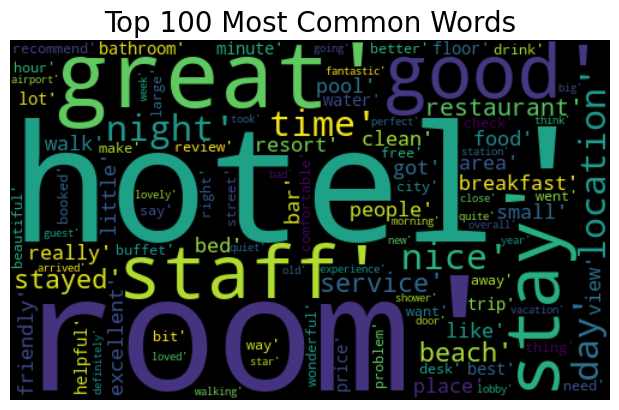

In [258]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 100 Most Common Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [259]:
from collections import Counter
mostfreq=df.groupby('Rating')['cleaned_review'].apply(lambda x : Counter(' '.join(x).split()).most_common(25))
mostfreq

Rating
1    [(room, 4294), (hotel, 4002), (stay, 1246), (d...
2    [(room, 5772), (hotel, 4657), (night, 1618), (...
3    [(room, 6128), (hotel, 5628), (good, 2523), (n...
4    [(hotel, 15535), (room, 14239), (great, 7572),...
5    [(hotel, 24164), (room, 17314), (great, 10886)...
Name: cleaned_review, dtype: object

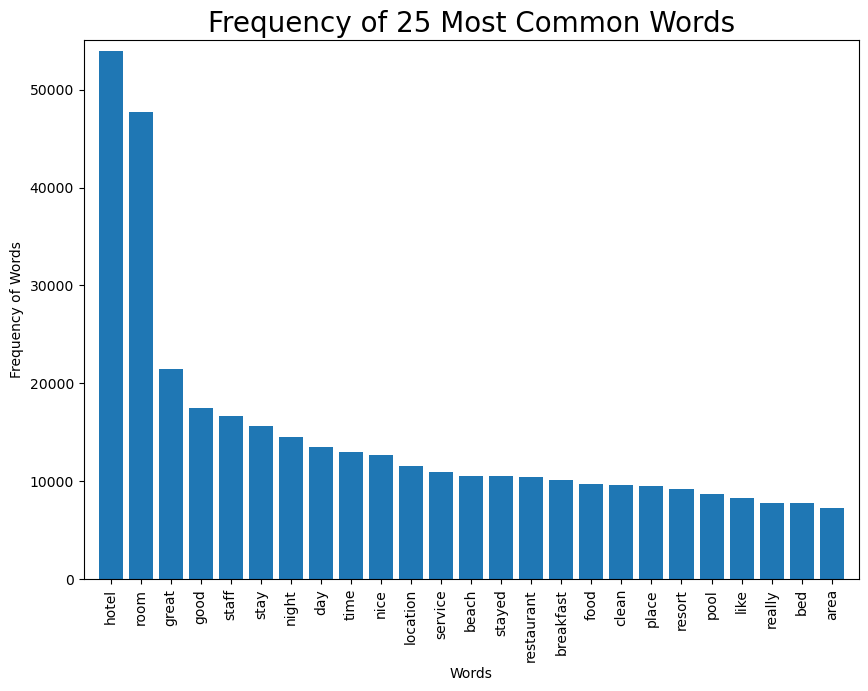

In [260]:
mostcommon_small=FreqDist(allwords).most_common(25)
x,y=zip(*mostcommon_small)
plt.figure(figsize=(10,7))
plt.margins(0.02)
plt.bar(x,y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

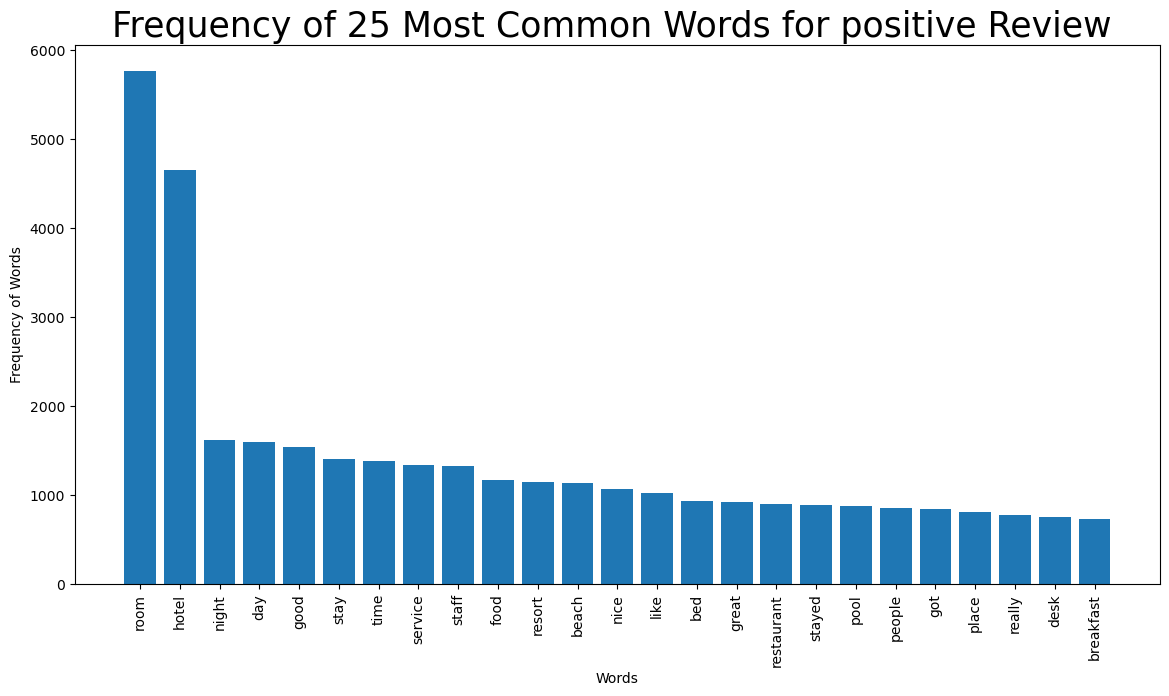

In [261]:
positive=mostfreq.iloc[1]
words=list(zip(*positive))[0]
freq=list(zip(*positive))[1]


plt.figure(figsize=(14,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.title('Frequency of 25 Most Common Words for positive Review ', fontsize=25)
plt.show()

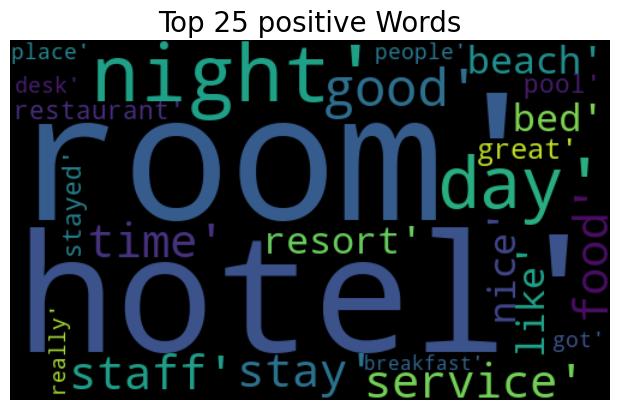

In [262]:
from wordcloud import WordCloud, ImageColorGenerator
wordcloud=WordCloud(width=500, height=300, background_color='black').generate(str(positive))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 25 positive Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

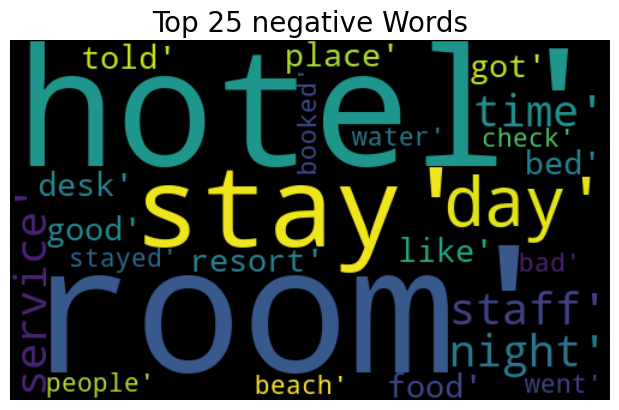

In [263]:
from wordcloud import WordCloud, ImageColorGenerator
neagtive=mostfreq.iloc[0]
words=list(zip(*neagtive))[0]
freq=list(zip(*neagtive))[1]
wordcloud=WordCloud(width=500, height=300, background_color='black').generate(str(neagtive))
fig = plt.figure(figsize=(6,4), facecolor='white')
plt.title('Top 25 negative Words', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

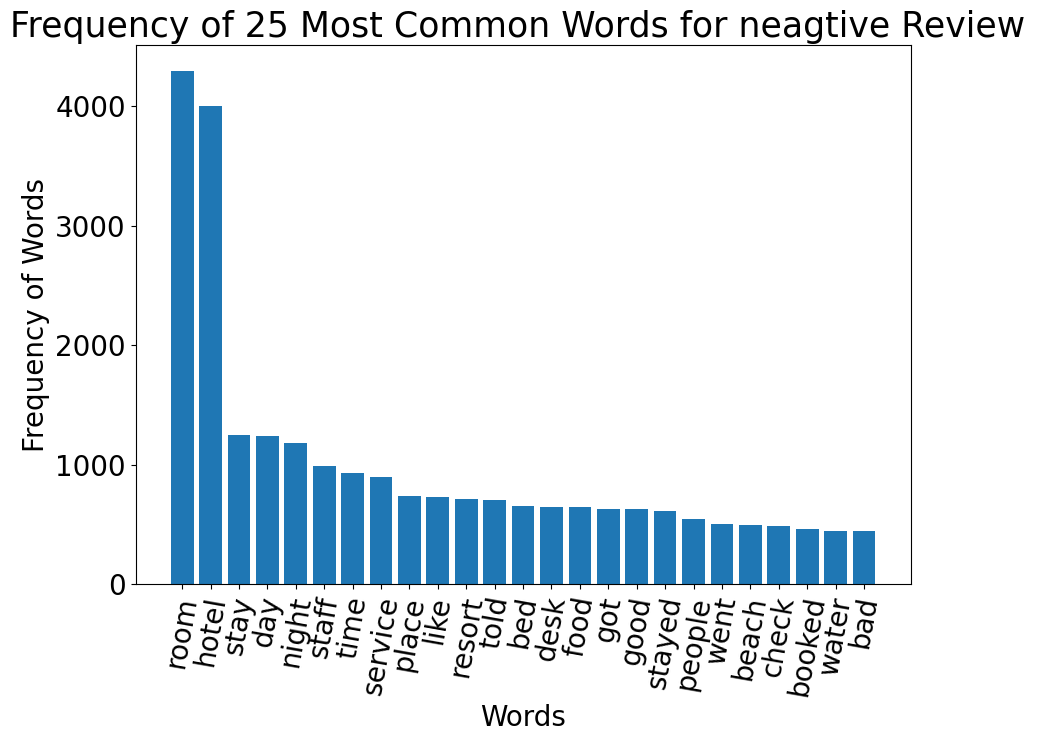

In [264]:
neagtive=mostfreq.iloc[0]
words=list(zip(*neagtive))[0]
freq=list(zip(*neagtive))[1]


plt.figure(figsize=(10,7))
plt.bar(words, freq)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=80, fontsize=20)
plt.title('Frequency of 25 Most Common Words for neagtive Review ', fontsize=25)
plt.show()

In [265]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')


##  Using Count vectorizer

In [266]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(words)
print(X.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 

In [267]:
vocab = vectorizer.vocabulary_
vocab

{'room': 16,
 'hotel': 10,
 'stay': 19,
 'day': 5,
 'night': 12,
 'staff': 18,
 'time': 21,
 'service': 17,
 'place': 14,
 'like': 11,
 'resort': 15,
 'told': 22,
 'bed': 2,
 'desk': 6,
 'food': 7,
 'got': 9,
 'good': 8,
 'stayed': 20,
 'people': 13,
 'went': 24,
 'beach': 1,
 'check': 4,
 'booked': 3,
 'water': 23,
 'bad': 0}

# Using TF-IDF vectorizer


In [268]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(reviews['cleaned_review'])
pd.DataFrame(tfidf.toarray())
'''

"from sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer = TfidfVectorizer()\ntfidf = vectorizer.fit_transform(reviews['cleaned_review'])\npd.DataFrame(tfidf.toarray())\n"

In [269]:
'''
vectorizer = TfidfVectorizer()
model = vectorizer.fit(reviews['cleaned_review'])
dictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))
for sent in (reviews['cleaned_review']):
    for word in sent.split(): 
        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))
        print(word+" ----> " +str(tf_idf))
'''

'\nvectorizer = TfidfVectorizer()\nmodel = vectorizer.fit(reviews[\'cleaned_review\'])\ndictionary = dict( zip( model.get_feature_names(), list(np.log(model.idf_))))\nfor sent in (reviews[\'cleaned_review\']):\n    for word in sent.split(): \n        tf_idf = dictionary[word.lower()]*(sent.count(word)/len(sent.split()))\n        print(word+" ----> " +str(tf_idf))\n'

In [270]:
tfidf_vect= TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit(df['cleaned_review'])

In [271]:
X_train_tfidf_transform = X_train_tfidf.transform(df['cleaned_review'])

## Word2Vec

In [272]:
!python -m spacy download en_core_web_lg

Could not find platform independent libraries <prefix>
Python path configuration:
  PYTHONHOME = (not set)
  PYTHONPATH = (not set)
  program name = 'python.exe'
  isolated = 0
  environment = 1
  user site = 1
  safe_path = 0
  import site = 1
  is in build tree = 0
  stdlib dir = 'C:\Users\Asus\raju\Lib'
  sys._base_executable = 'C:\\Users\\Asus\\raju\\python.exe'
  sys.base_prefix = 'C:\\Users\\Asus\\raju'
  sys.base_exec_prefix = 'C:\\Users\\Asus\\raju'
  sys.platlibdir = 'DLLs'
  sys.executable = 'C:\\Users\\Asus\\raju\\python.exe'
  sys.prefix = 'C:\\Users\\Asus\\raju'
  sys.exec_prefix = 'C:\\Users\\Asus\\raju'
  sys.path = [
    'C:\\Users\\Asus\\raju\\python311.zip',
    'C:\\Users\\Asus\\raju\\DLLs',
    'C:\\Users\\Asus\\raju\\Lib',
    'C:\\Users\\Asus\\raju',
  ]
Fatal Python error: init_fs_encoding: failed to get the Python codec of the filesystem encoding
Python runtime state: core initialized
ModuleNotFoundError: No module named 'encodings'

Current thread 0x0000426c (m

# Import spaCy and load the language library


In [273]:
import spacy
nlp = spacy.load('en_core_web_lg') 

In [274]:
nlp('Hotel').vector.shape

(300,)

In [275]:
doc = nlp(u'The hotel was clean and has good maintainance.')

In [276]:
# Create a three-token Doc object:
tokens = nlp(u'hotel room service')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

hotel hotel 1.0
hotel room 0.5016397833824158
hotel service 0.2857384979724884
room hotel 0.5016397833824158
room room 1.0
room service 0.11908162385225296
service hotel 0.2857384979724884
service room 0.11908162385225296
service service 1.0


# Model Building

## SPLITTING THE DATASET INTO TRAIN AND TEST 

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_transform,df['review_segment'],
                                                    test_size=0.3, random_state=30,shuffle=True)

In [278]:
print(X_train.shape,y_train.shape)
X_test.shape,y_test.shape

(14343, 45616) (14343,)


((6148, 45616), (6148,))

In [279]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred)) 

# Logistic Regression


In [280]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.37      0.54       866
    positive       0.96      1.00      0.98     13477

    accuracy                           0.96     14343
   macro avg       0.98      0.68      0.76     14343
weighted avg       0.96      0.96      0.95     14343


 [[  319   547]
 [    1 13476]]

 0.9617932092309838
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.97      0.24      0.38       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.97      0.62      0.68      6148
weighted avg       0.96      0.96      0.95      6148


 [[  77  247]
 [   2 5822]]

 0.9594990240728692


# Random Forest Classifier

In [281]:
rf = RandomForestClassifier(max_features=400)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.97      0.09      0.16       324
    positive       0.95      1.00      0.98      5824

    accuracy                           0.95      6148
   macro avg       0.96      0.54      0.57      6148
weighted avg       0.95      0.95      0.93      6148


 [[  28  296]
 [   1 5823]]

 0.9516916070266753


# Multinomial Naivebayes

In [282]:
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       866
    positive       0.94      1.00      0.97     13477

    accuracy                           0.94     14343
   macro avg       0.47      0.50      0.48     14343
weighted avg       0.88      0.94      0.91     14343


 [[    0   866]
 [    0 13477]]

 0.9396221153175766
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.47      0.50      0.49      6148
weighted avg       0.90      0.95      0.92      6148


 [[   0  324]
 [   0 5824]]

 0.9472999349381913


# Gradient Boosting Classifier

In [283]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.94      0.51      0.66       866
    positive       0.97      1.00      0.98     13477

    accuracy                           0.97     14343
   macro avg       0.96      0.76      0.82     14343
weighted avg       0.97      0.97      0.96     14343


 [[  445   421]
 [   28 13449]]

 0.9686955309210068
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.81      0.42      0.56       324
    positive       0.97      0.99      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.89      0.71      0.77      6148
weighted avg       0.96      0.96      0.96      6148


 [[ 137  187]
 [  32 5792]]

 0.9643786597267404


# SVM

In [284]:
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(X_train,y_train)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      0.96      0.98       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      0.98      0.99     14343
weighted avg       1.00      1.00      1.00     14343


 [[  832    34]
 [    0 13477]]

 0.9976295056822143
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.95      0.25      0.40       324
    positive       0.96      1.00      0.98      5824

    accuracy                           0.96      6148
   macro avg       0.96      0.63      0.69      6148
weighted avg       0.96      0.96      0.95      6148


 [[  82  242]
 [   4 5820]]

 0.9599869876382563


# DecissionTree

In [285]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       866
    positive       1.00      1.00      1.00     13477

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[  866     0]
 [    0 13477]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.44      0.48      0.46       324
    positive       0.97      0.97      0.97      5824

    accuracy                           0.94      6148
   macro avg       0.71      0.72      0.71      6148
weighted avg       0.94      0.94      0.94      6148


 [[ 154  170]
 [ 193 5631]]

 0.9409564085881588


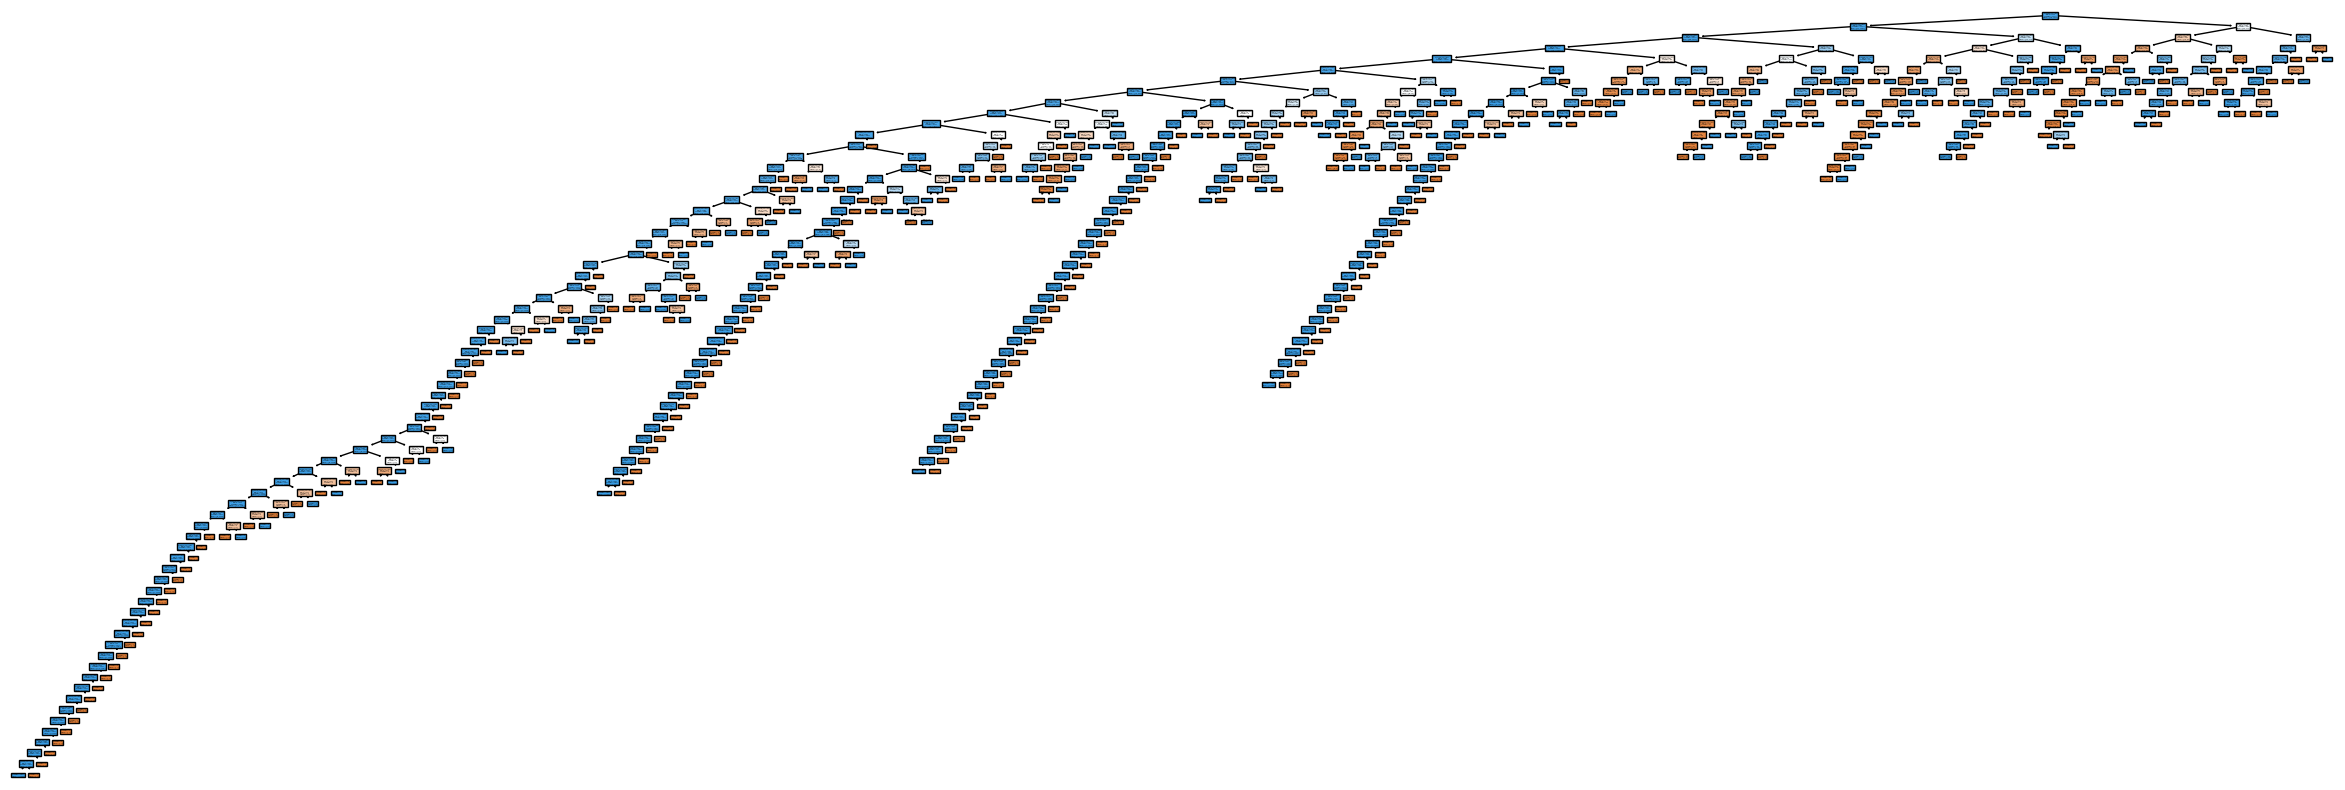

In [286]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt,filled=True)
plt.show()

# K Neighbors Classifier

In [287]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
y_train_pred = kn.predict(X_train)
y_test_pred = kn.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.89      0.23      0.37       866
    positive       0.95      1.00      0.97     13477

    accuracy                           0.95     14343
   macro avg       0.92      0.61      0.67     14343
weighted avg       0.95      0.95      0.94     14343


 [[  199   667]
 [   25 13452]]

 0.9517534685909503
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.68      0.15      0.24       324
    positive       0.95      1.00      0.97      5824

    accuracy                           0.95      6148
   macro avg       0.82      0.57      0.61      6148
weighted avg       0.94      0.95      0.94      6148


 [[  48  276]
 [  23 5801]]

 0.9513662979830839


# AdaBoost Classifier

In [288]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

    negative       0.80      0.62      0.70       866
    positive       0.98      0.99      0.98     13477

    accuracy                           0.97     14343
   macro avg       0.89      0.81      0.84     14343
weighted avg       0.97      0.97      0.97     14343


 [[  541   325]
 [  137 13340]]

 0.9677891654465594
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

    negative       0.75      0.60      0.67       324
    positive       0.98      0.99      0.98      5824

    accuracy                           0.97      6148
   macro avg       0.87      0.80      0.83      6148
weighted avg       0.97      0.97      0.97      6148


 [[ 196  128]
 [  64 5760]]

 0.9687703318152244


# Final the model with SVM

In [289]:
import pandas as pnd  
import numpy as nmp  
import pickle   
import streamlit as smt  
from PIL import Image as img 
from sklearn import model_selection
df_numeric.dropna(inplace=True)

In [290]:
df ='svm1.sav'
pickle.dump(svm1, open(df, 'wb'))

In [291]:
loaded_model = pickle.load(open(df, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9599869876382563


In [292]:
y_test.head(50)


15558    positive
12361    negative
4808     positive
19232    positive
16294    negative
15086    positive
18878    positive
16404    positive
3976     positive
14748    positive
9900     positive
11762    positive
1436     positive
7108     positive
9491     positive
14389    positive
13441    positive
8397     positive
881      positive
17986    positive
4953     positive
15462    positive
965      positive
4829     positive
20354    positive
2207     positive
9420     positive
13403    positive
13930    positive
19511    positive
15955    negative
887      positive
3870     positive
19521    positive
3277     positive
870      positive
15770    positive
14670    positive
19946    positive
19025    positive
2010     positive
19938    positive
4719     positive
19222    positive
3029     positive
6637     positive
5646     negative
18147    positive
10342    positive
3572     positive
Name: review_segment, dtype: object

In [293]:
X_test

<6148x45616 sparse matrix of type '<class 'numpy.float64'>'
	with 466173 stored elements in Compressed Sparse Row format>

In [294]:
y_test.value_counts()


review_segment
positive    5824
negative     324
Name: count, dtype: int64

In [295]:
y_test.value_counts()


review_segment
positive    5824
negative     324
Name: count, dtype: int64

# Deployment

In [296]:
# Importing the libraries
import streamlit as st
import pickle
import spacy



# import numpy as np
# from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer


# Body of the application
st.header("Hotel Review Prediction Application.")
st.markdown("This application is trained on machine learning model.\n "
            "This application can predict if the given **review**"
            " is **Positive, Negative or Neutral**")


text = st.text_input("Type your review here...", """""")


# Working on prediction
# Loading trained model
loaded_model = pickle.load(open(r"C:\Users\Asus\raju\svm1.sav", "rb"))


# Preprocessing the text
nlp = spacy.load("en_core_web_sm")

In [297]:

def preprocessing(text):
    """Takes the text input and removes the stop words and punctuations from the text and gives processed text output.
    """
    global nlp
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


preprocessed_input = [preprocessing(text)]
st.write(preprocessed_input)

# Tfidf


# Making prediction
if st.button("Click to make prediction"):

    # Making prediction for model input
    prediction = int(loaded_model.predict(preprocessed_input))
    st.write(prediction)

    # Returning true prediction
    if prediction == -1:
        st.write("Negative")
    elif prediction == 1:
        st.write("Positive")
    else:
        st.write("Neutral")
else:
    pass

